Delta_TL

/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [18:07:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:



--- XGBoost Evaluation on New File ---
RMSE: 1.8584
MAE:  1.3309
R²:   0.9399


/tmp/ipykernel_8493/3815395704.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


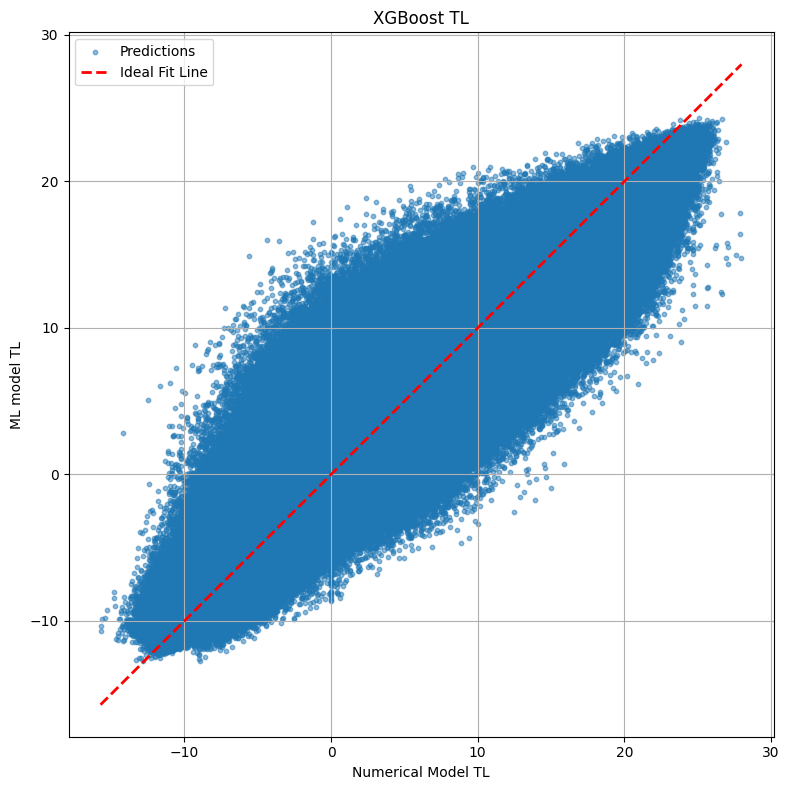

In [3]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# === SETTINGS ===
new_file = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/Test/final_file.csv'
model_save_path = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/Xgboost/models/xgb_tl_final.model'
scaler_save_path = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/Xgboost/scalers/xgb_tl_final.save'

# === LOAD MODEL AND SCALERS ===
model: XGBRegressor = joblib.load(model_save_path)
scalers = joblib.load(scaler_save_path)

# === LOAD & PREPROCESS TEST FILE ===
df = pd.read_csv(new_file)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']], errors='coerce')
df = df.dropna(subset=['Date'])

# Time-based features
df['DayOfYear'] = df['Date'].dt.dayofyear
df['HourOfDay'] = df['Date'].dt.hour
df['sin_doy'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.0)
df['cos_doy'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.0)
df['sin_hour'] = np.sin(2 * np.pi * df['HourOfDay'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['HourOfDay'] / 24)

# Ensure required columns are present
features = ['AirTemp','Wind','Tdp','Solar','sin_doy','cos_doy','sin_hour','cos_hour','Depth','Albedo','TL']
df = df[features].dropna().reset_index(drop=True)

X = df.drop(columns='TL').values
y_true = df['TL'].values

# === SCALE FEATURES USING SAVED SCALERS ===
X_scaled = np.zeros_like(X)
for i in range(X.shape[1]):
    X_scaled[:, i] = scalers[i].transform(X[:, i].reshape(-1, 1)).flatten()

# === PREDICT WITH LOADED MODEL ===
y_pred = model.predict(X_scaled)

# === METRICS ===
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n--- XGBoost Evaluation on New File ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

# === SCATTER PLOT ===
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.5, s=10, label='Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel("Numerical Model TL")
plt.ylabel("ML model TL")
plt.title("XGBoost TL")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


CESR

/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [18:07:36] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:



--- XGBoost Evaluation on New File ---
RMSE: 0.0362
MAE:  0.0250
R²:   0.9283


/tmp/ipykernel_8493/633603339.py:65: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


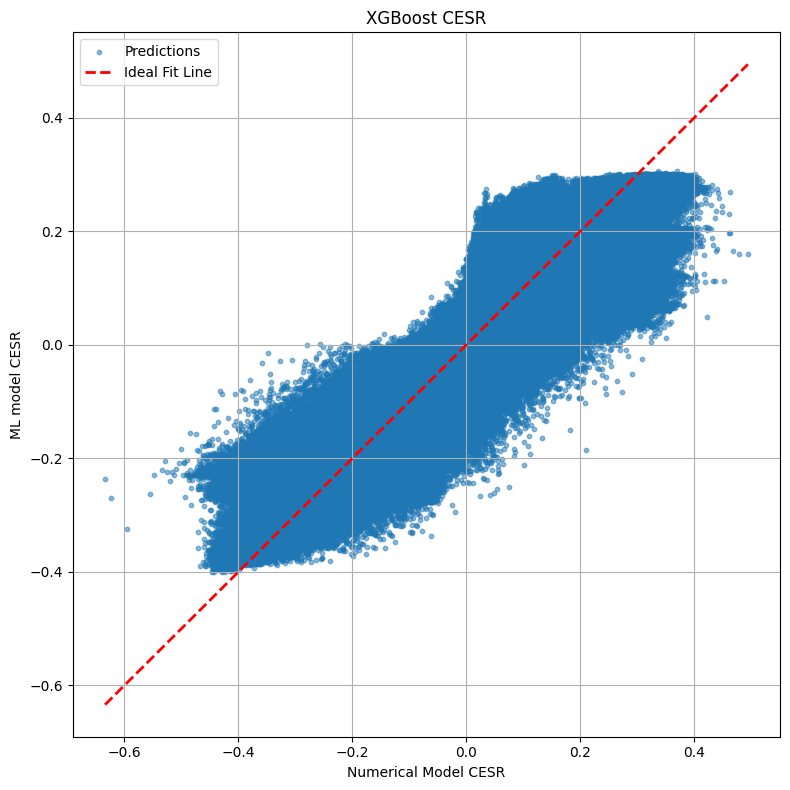

In [4]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor

# === SETTINGS ===
new_file = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/Test/final_file.csv'
model_save_path = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/Xgboost/models/xgb_cesr_final.model'
scaler_save_path = '/home/bel/Desktop/Shiv_SRIP/ATenLoc/Xgboost/scalers/xgb_cesr_final.save'

# === LOAD MODEL AND SCALERS ===
model: XGBRegressor = joblib.load(model_save_path)
scalers = joblib.load(scaler_save_path)

# === LOAD & PREPROCESS TEST FILE ===
df = pd.read_csv(new_file)
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour']], errors='coerce')
df = df.dropna(subset=['Date'])

# Time-based features
df['DayOfYear'] = df['Date'].dt.dayofyear
df['HourOfDay'] = df['Date'].dt.hour
df['sin_doy'] = np.sin(2 * np.pi * df['DayOfYear'] / 365.0)
df['cos_doy'] = np.cos(2 * np.pi * df['DayOfYear'] / 365.0)
df['sin_hour'] = np.sin(2 * np.pi * df['HourOfDay'] / 24)
df['cos_hour'] = np.cos(2 * np.pi * df['HourOfDay'] / 24)

# Ensure required columns are present
features = ['AirTemp','Wind','Tdp','Solar','sin_doy','cos_doy','sin_hour','cos_hour','Depth','Albedo','CESR']
df = df[features].dropna().reset_index(drop=True)

X = df.drop(columns='CESR').values
y_true = df['CESR'].values

# === SCALE FEATURES USING SAVED SCALERS ===
X_scaled = np.zeros_like(X)
for i in range(X.shape[1]):
    X_scaled[:, i] = scalers[i].transform(X[:, i].reshape(-1, 1)).flatten()

# === PREDICT WITH LOADED MODEL ===
y_pred = model.predict(X_scaled)

# === METRICS ===
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("\n--- XGBoost Evaluation on New File ---")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")

# === SCATTER PLOT ===
plt.figure(figsize=(8, 8))
plt.scatter(y_true, y_pred, alpha=0.5, s=10, label='Predictions')
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label='Ideal Fit Line')
plt.xlabel("Numerical Model CESR")
plt.ylabel("ML model CESR")
plt.title("XGBoost CESR")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import uniform, randint
import joblib
import warnings
warnings.filterwarnings('ignore')

# --- Define the model ---
xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    tree_method='gpu_hist' if joblib.cpu_count() > 1 else 'auto',
    verbosity=1
)

param_dist = {
    'n_estimators': randint(50, 300),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 5),
    'min_child_weight': randint(1, 10)
}

search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=40,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# --- Fit Search ---
search.fit(X_train_scaled, y_train)

# --- Best Model ---
best_model = search.best_estimator_
print("\nBest Parameters:")
print(search.best_params_)

# # Save best model
# tuned_model_path = model_save_path.replace('.model', '_tuned.model')
# joblib.dump(best_model, tuned_model_path)
# print(f"Tuned model saved to: {tuned_model_path}")


Fitting 3 folds for each of 40 candidates, totalling 120 fits


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:30] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.836965827544817, gamma=0.23225206359998862, learning_rate=0.1315089703802877, max_depth=7, min_child_weight=9, n_estimators=216, subsample=0.6053059844639466; total time=  19.2s
[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=152, subsample=0.7783331011414365; total time=  19.4s
[CV] END colsample_bytree=0.9329770563201687, gamma=1.0616955533913808, learning_rate=0.04636499344142013, max_depth=7, min_child_weight=1, n_estimators=253, subsample=0.8446612641953124; total time=  19.0s
[CV] END colsample_bytree=0.7123738038749523, gamma=2.7134804157912424, learning_rate=0.03818484499495253, max_depth=9, min_child_weight=1, n_estimators=138, subsample=0.9947547746402069; total time=  19.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6028265220878869, gamma=0.11531212520707879, learning_rate=0.11495493205167782, max_depth=9, min_child_weight=3, n_estimators=157, subsample=0.8056937753654446; total time=  19.4s
[CV] END colsample_bytree=0.9369139098379994, gamma=2.248770666848828, learning_rate=0.08903004720036288, max_depth=6, min_child_weight=8, n_estimators=255, subsample=0.6783931449676581; total time=  19.5s
[CV] END colsample_bytree=0.836965827544817, gamma=0.23225206359998862, learning_rate=0.1315089703802877, max_depth=7, min_child_weight=9, n_estimators=216, subsample=0.6053059844639466; total time=  19.6s
[CV] END colsample_bytree=0.9768807022739411, gamma=2.8164410892276965, learning_rate=0.08708330050798323, max_depth=4, min_child_weight=5, n_estimators=179, subsample=0.8736932106048627; total time=  19.5s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.672894435115225, gamma=3.7768070515882624, learning_rate=0.09503117489824894, max_depth=8, min_child_weight=4, n_estimators=103, subsample=0.6125253169822235; total time=  20.1s
[CV] END colsample_bytree=0.6399899663272012, gamma=2.2962444598293357, learning_rate=0.07674172222780437, max_depth=5, min_child_weight=6, n_estimators=102, subsample=0.9879639408647978; total time=  20.1s
[CV] END colsample_bytree=0.836965827544817, gamma=0.23225206359998862, learning_rate=0.1315089703802877, max_depth=7, min_child_weight=9, n_estimators=216, subsample=0.6053059844639466; total time=  20.2s
[CV] END colsample_bytree=0.9768807022739411, gamma=2.8164410892276965, learning_rate=0.08708330050798323, max_depth=4, min_child_weight=5, n_estimators=179, subsample=0.8736932106048627; total time=  20.2s
[CV] END colsample_bytree=0.9329770563201687, gamma=1.0616955533913808, learning_rate=0.04636499344142013, max_depth=7, min_child_weight=1, n_estimators=253, subsample=0.8446

/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.672894435115225, gamma=3.7768070515882624, learning_rate=0.09503117489824894, max_depth=8, min_child_weight=4, n_estimators=103, subsample=0.6125253169822235; total time=  20.8s
[CV] END colsample_bytree=0.6399899663272012, gamma=2.2962444598293357, learning_rate=0.07674172222780437, max_depth=5, min_child_weight=6, n_estimators=102, subsample=0.9879639408647978; total time=  21.0s
[CV] END colsample_bytree=0.6028265220878869, gamma=0.11531212520707879, learning_rate=0.11495493205167782, max_depth=9, min_child_weight=3, n_estimators=157, subsample=0.8056937753654446; total time=  20.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6399899663272012, gamma=2.2962444598293357, learning_rate=0.07674172222780437, max_depth=5, min_child_weight=6, n_estimators=102, subsample=0.9879639408647978; total time=  21.2s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.9768807022739411, gamma=2.8164410892276965, learning_rate=0.08708330050798323, max_depth=4, min_child_weight=5, n_estimators=179, subsample=0.8736932106048627; total time=  21.5s
[CV] END colsample_bytree=0.9369139098379994, gamma=2.248770666848828, learning_rate=0.08903004720036288, max_depth=6, min_child_weight=8, n_estimators=255, subsample=0.6783931449676581; total time=  21.6s
[CV] END colsample_bytree=0.9369139098379994, gamma=2.248770666848828, learning_rate=0.08903004720036288, max_depth=6, min_child_weight=8, n_estimators=255, subsample=0.6783931449676581; total time=  21.6s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.7760609974958406, gamma=0.6101911742238941, learning_rate=0.10903538202225403, max_depth=9, min_child_weight=3, n_estimators=255, subsample=0.7564242430292963; total time=  21.9s
[CV] END colsample_bytree=0.672894435115225, gamma=3.7768070515882624, learning_rate=0.09503117489824894, max_depth=8, min_child_weight=4, n_estimators=103, subsample=0.6125253169822235; total time=  21.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=152, subsample=0.7783331011414365; total time=  22.4s
[CV] END colsample_bytree=0.9329770563201687, gamma=1.0616955533913808, learning_rate=0.04636499344142013, max_depth=7, min_child_weight=1, n_estimators=253, subsample=0.8446612641953124; total time=  22.1s
[CV] END colsample_bytree=0.6180909155642152, gamma=1.6266516538163218, learning_rate=0.0877354579378964, max_depth=4, min_child_weight=5, n_estimators=73, subsample=0.7427013306774357; total time=  22.1s
[CV] END colsample_bytree=0.7760609974958406, gamma=0.6101911742238941, learning_rate=0.10903538202225403, max_depth=9, min_child_weight=3, n_estimators=255, subsample=0.7564242430292963; total time=  22.6s
[CV] END colsample_bytree=0.6028265220878869, gamma=0.11531212520707879, learning_rate=0.11495493205167782, max_depth=9, min_child_weight=3, n_estimators=157, subsample=0.805693

/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:25:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:25:42] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=0.6180909155642152, gamma=1.6266516538163218, learning_rate=0.0877354579378964, max_depth=4, min_child_weight=5, n_estimators=73, subsample=0.7427013306774357; total time=  31.6s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:25:46] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:25:46] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/p

[CV] END colsample_bytree=0.749816047538945, gamma=4.75357153204958, learning_rate=0.15639878836228102, max_depth=7, min_child_weight=5, n_estimators=152, subsample=0.7783331011414365; total time=  35.2s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:25:48] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:25:48] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/p

[CV] END colsample_bytree=0.7123738038749523, gamma=2.7134804157912424, learning_rate=0.03818484499495253, max_depth=9, min_child_weight=1, n_estimators=138, subsample=0.9947547746402069; total time=  37.0s
[CV] END colsample_bytree=0.7760609974958406, gamma=0.6101911742238941, learning_rate=0.10903538202225403, max_depth=9, min_child_weight=3, n_estimators=255, subsample=0.7564242430292963; total time=  37.0s
[CV] END colsample_bytree=0.9160702162124823, gamma=3.029799873905057, learning_rate=0.19526017570266982, max_depth=4, min_child_weight=9, n_estimators=77, subsample=0.9452413703502374; total time=  17.4s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8550229885420852, gamma=4.436063712881633, learning_rate=0.10444298503238986, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.8886918084659492; total time=  16.6s
[CV] END colsample_bytree=0.908897907718663, gamma=0.993578407670862, learning_rate=0.01110442342472048, max_depth=5, min_child_weight=3, n_estimators=130, subsample=0.88453678109946; total time=  17.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6943939678995823, gamma=1.2803416138066197, learning_rate=0.01808671790768627, max_depth=9, min_child_weight=3, n_estimators=112, subsample=0.9583054382694077; total time=  16.8s
[CV] END colsample_bytree=0.8497416192535173, gamma=1.47816842918857, learning_rate=0.031098851966054122, max_depth=6, min_child_weight=4, n_estimators=79, subsample=0.9533121035675474; total time=  15.7s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8493192507310232, gamma=1.654490124263246, learning_rate=0.02271167005720473, max_depth=9, min_child_weight=8, n_estimators=86, subsample=0.8918424713352255; total time=  18.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8550229885420852, gamma=4.436063712881633, learning_rate=0.10444298503238986, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.8886918084659492; total time=  18.2s
[CV] END colsample_bytree=0.9160702162124823, gamma=3.029799873905057, learning_rate=0.19526017570266982, max_depth=4, min_child_weight=9, n_estimators=77, subsample=0.9452413703502374; total time=  19.2s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.908897907718663, gamma=0.993578407670862, learning_rate=0.01110442342472048, max_depth=5, min_child_weight=3, n_estimators=130, subsample=0.88453678109946; total time=  20.0s
[CV] END colsample_bytree=0.8493192507310232, gamma=1.654490124263246, learning_rate=0.02271167005720473, max_depth=9, min_child_weight=8, n_estimators=86, subsample=0.8918424713352255; total time=  18.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:52] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.7123738038749523, gamma=2.7134804157912424, learning_rate=0.03818484499495253, max_depth=9, min_child_weight=1, n_estimators=138, subsample=0.9947547746402069; total time=  20.5s
[CV] END colsample_bytree=0.9160702162124823, gamma=3.029799873905057, learning_rate=0.19526017570266982, max_depth=4, min_child_weight=9, n_estimators=77, subsample=0.9452413703502374; total time=  20.3s
[CV] END colsample_bytree=0.7901480892728447, gamma=2.8163778598819182, learning_rate=0.14910321728522552, max_depth=7, min_child_weight=7, n_estimators=280, subsample=0.7641531692142519; total time=  17.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.908897907718663, gamma=0.993578407670862, learning_rate=0.01110442342472048, max_depth=5, min_child_weight=3, n_estimators=130, subsample=0.88453678109946; total time=  20.7s
[CV] END colsample_bytree=0.7901480892728447, gamma=2.8163778598819182, learning_rate=0.14910321728522552, max_depth=7, min_child_weight=7, n_estimators=280, subsample=0.7641531692142519; total time=  18.1s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:53] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9022204554172195, gamma=1.1439908274581123, learning_rate=0.0253959819657586, max_depth=5, min_child_weight=3, n_estimators=135, subsample=0.9521871356061031; total time=  18.1s
[CV] END colsample_bytree=0.8493192507310232, gamma=1.654490124263246, learning_rate=0.02271167005720473, max_depth=9, min_child_weight=8, n_estimators=86, subsample=0.8918424713352255; total time=  20.1s
[CV] END colsample_bytree=0.8497416192535173, gamma=1.47816842918857, learning_rate=0.031098851966054122, max_depth=6, min_child_weight=4, n_estimators=79, subsample=0.9533121035675474; total time=  17.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.9022204554172195, gamma=1.1439908274581123, learning_rate=0.0253959819657586, max_depth=5, min_child_weight=3, n_estimators=135, subsample=0.9521871356061031; total time=  18.6s
[CV] END colsample_bytree=0.6943939678995823, gamma=1.2803416138066197, learning_rate=0.01808671790768627, max_depth=9, min_child_weight=3, n_estimators=112, subsample=0.9583054382694077; total time=  19.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:25:54] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8497416192535173, gamma=1.47816842918857, learning_rate=0.031098851966054122, max_depth=6, min_child_weight=4, n_estimators=79, subsample=0.9533121035675474; total time=  18.9s
[CV] END colsample_bytree=0.9022204554172195, gamma=1.1439908274581123, learning_rate=0.0253959819657586, max_depth=5, min_child_weight=3, n_estimators=135, subsample=0.9521871356061031; total time=  19.7s
[CV] END colsample_bytree=0.6943939678995823, gamma=1.2803416138066197, learning_rate=0.01808671790768627, max_depth=9, min_child_weight=3, n_estimators=112, subsample=0.9583054382694077; total time=  20.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:26:01] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:26:01] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might 

[CV] END colsample_bytree=0.8550229885420852, gamma=4.436063712881633, learning_rate=0.10444298503238986, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.8886918084659492; total time=  28.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:04] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7939319885435933, gamma=3.4621801644513517, learning_rate=0.0638824667597043, max_depth=9, min_child_weight=6, n_estimators=209, subsample=0.8075162486973464; total time=  13.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:05] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7708431154505025, gamma=4.090073829612465, learning_rate=0.1821461166512687, max_depth=9, min_child_weight=6, n_estimators=249, subsample=0.8136357677501768; total time=  15.4s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7708431154505025, gamma=4.090073829612465, learning_rate=0.1821461166512687, max_depth=9, min_child_weight=6, n_estimators=249, subsample=0.8136357677501768; total time=  17.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:06] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7708431154505025, gamma=4.090073829612465, learning_rate=0.1821461166512687, max_depth=9, min_child_weight=6, n_estimators=249, subsample=0.8136357677501768; total time=  22.1s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.881207583558071, gamma=1.81814801189647, learning_rate=0.20435641654419215, max_depth=6, min_child_weight=7, n_estimators=179, subsample=0.8849082359697769; total time=  17.3s
[CV] END colsample_bytree=0.7939319885435933, gamma=3.4621801644513517, learning_rate=0.0638824667597043, max_depth=9, min_child_weight=6, n_estimators=209, subsample=0.8075162486973464; total time=  18.5s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:08] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7114585856946446, gamma=4.541329429833269, learning_rate=0.05791237813339449, max_depth=4, min_child_weight=5, n_estimators=221, subsample=0.7791132658292367; total time=  16.0s
[CV] END colsample_bytree=0.7901480892728447, gamma=2.8163778598819182, learning_rate=0.14910321728522552, max_depth=7, min_child_weight=7, n_estimators=280, subsample=0.7641531692142519; total time=  34.0s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.7297380084021096, gamma=0.6104397735033668, learning_rate=0.08125956761539498, max_depth=8, min_child_weight=1, n_estimators=178, subsample=0.6911740650167767; total time=  32.4s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:09] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.7114585856946446, gamma=4.541329429833269, learning_rate=0.05791237813339449, max_depth=4, min_child_weight=5, n_estimators=221, subsample=0.7791132658292367; total time=  17.1s
[CV] END colsample_bytree=0.881207583558071, gamma=1.81814801189647, learning_rate=0.20435641654419215, max_depth=6, min_child_weight=7, n_estimators=179, subsample=0.8849082359697769; total time=  18.5s
[CV] END colsample_bytree=0.6592347719813599, gamma=4.98870242524471, learning_rate=0.063356202855057, max_depth=4, min_child_weight=2, n_estimators=269, subsample=0.6205915004999957; total time=  18.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8783251227163527, gamma=4.291794024068599, learning_rate=0.07519178104037695, max_depth=6, min_child_weight=3, n_estimators=139, subsample=0.8048372233197124; total time=  15.6s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.6104397735033668, learning_rate=0.08125956761539498, max_depth=8, min_child_weight=1, n_estimators=178, subsample=0.6911740650167767; total time=  33.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6592347719813599, gamma=4.98870242524471, learning_rate=0.063356202855057, max_depth=4, min_child_weight=2, n_estimators=269, subsample=0.6205915004999957; total time=  18.4s
[CV] END colsample_bytree=0.7297380084021096, gamma=0.6104397735033668, learning_rate=0.08125956761539498, max_depth=8, min_child_weight=1, n_estimators=178, subsample=0.6911740650167767; total time=  34.2s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:10] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.8211572356285312, gamma=2.9634836193969676, learning_rate=0.026170665266543047, max_depth=5, min_child_weight=1, n_estimators=87, subsample=0.7471132530877013; total time=  17.6s
[CV] END colsample_bytree=0.8783251227163527, gamma=4.291794024068599, learning_rate=0.07519178104037695, max_depth=6, min_child_weight=3, n_estimators=139, subsample=0.8048372233197124; total time=  17.0s
[CV] END colsample_bytree=0.8211572356285312, gamma=2.9634836193969676, learning_rate=0.026170665266543047, max_depth=5, min_child_weight=1, n_estimators=87, subsample=0.7471132530877013; total time=  17.6s
[CV] END colsample_bytree=0.8529223322374317, gamma=3.1676485538044736, learning_rate=0.11715493681495169, max_depth=3, min_child_weight=9, n_estimators=173, subsample=0.8032795106962874; total time=  17.5s
[CV] END colsample_bytree=0.7939319885435933, gamma=3.4621801644513517, learning_rate=0.0638824667597043, max_depth=9, min_child_weight=6, n_estimators=209, subsample=0.8075

/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:11] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.8783251227163527, gamma=4.291794024068599, learning_rate=0.07519178104037695, max_depth=6, min_child_weight=3, n_estimators=139, subsample=0.8048372233197124; total time=  17.6s
[CV] END colsample_bytree=0.6592347719813599, gamma=4.98870242524471, learning_rate=0.063356202855057, max_depth=4, min_child_weight=2, n_estimators=269, subsample=0.6205915004999957; total time=  19.9s
[CV] END colsample_bytree=0.881207583558071, gamma=1.81814801189647, learning_rate=0.20435641654419215, max_depth=6, min_child_weight=7, n_estimators=179, subsample=0.8849082359697769; total time=  21.5s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:12] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8211572356285312, gamma=2.9634836193969676, learning_rate=0.026170665266543047, max_depth=5, min_child_weight=1, n_estimators=87, subsample=0.7471132530877013; total time=  19.6s
[CV] END colsample_bytree=0.8529223322374317, gamma=3.1676485538044736, learning_rate=0.11715493681495169, max_depth=3, min_child_weight=9, n_estimators=173, subsample=0.8032795106962874; total time=  19.5s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9350840423629312, gamma=3.3784505851964037, learning_rate=0.15704322384815445, max_depth=4, min_child_weight=7, n_estimators=208, subsample=0.9509357413523924; total time=  16.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9350840423629312, gamma=3.3784505851964037, learning_rate=0.15704322384815445, max_depth=4, min_child_weight=7, n_estimators=208, subsample=0.9509357413523924; total time=  14.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9350840423629312, gamma=3.3784505851964037, learning_rate=0.15704322384815445, max_depth=4, min_child_weight=7, n_estimators=208, subsample=0.9509357413523924; total time=  17.4s
[CV] END colsample_bytree=0.7031766510860622, gamma=3.299920230170895, learning_rate=0.17344444004024318, max_depth=3, min_child_weight=4, n_estimators=109, subsample=0.7043316699321636; total time=  16.0s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7031766510860622, gamma=3.299920230170895, learning_rate=0.17344444004024318, max_depth=3, min_child_weight=4, n_estimators=109, subsample=0.7043316699321636; total time=  16.0s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:23] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9985014799031697, gamma=4.827096756443968, learning_rate=0.12165869072141952, max_depth=5, min_child_weight=7, n_estimators=58, subsample=0.7115485410368727; total time=  14.4s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9985014799031697, gamma=4.827096756443968, learning_rate=0.12165869072141952, max_depth=5, min_child_weight=7, n_estimators=58, subsample=0.7115485410368727; total time=  15.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.9985014799031697, gamma=4.827096756443968, learning_rate=0.12165869072141952, max_depth=5, min_child_weight=7, n_estimators=58, subsample=0.7115485410368727; total time=  16.2s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:25] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7031766510860622, gamma=3.299920230170895, learning_rate=0.17344444004024318, max_depth=3, min_child_weight=4, n_estimators=109, subsample=0.7043316699321636; total time=  17.1s
[CV] END colsample_bytree=0.8801431319891084, gamma=4.233305711191529, learning_rate=0.1812648583756185, max_depth=8, min_child_weight=8, n_estimators=210, subsample=0.8568126584617151; total time=  16.0s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6336559859980195, gamma=0.8081435704730688, learning_rate=0.18971083770541586, max_depth=6, min_child_weight=3, n_estimators=161, subsample=0.6405886171464128; total time=  16.1s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.8801431319891084, gamma=4.233305711191529, learning_rate=0.1812648583756185, max_depth=8, min_child_weight=8, n_estimators=210, subsample=0.8568126584617151; total time=  16.7s
[CV] END colsample_bytree=0.6336559859980195, gamma=0.8081435704730688, learning_rate=0.18971083770541586, max_depth=6, min_child_weight=3, n_estimators=161, subsample=0.6405886171464128; total time=  16.4s
[CV] END colsample_bytree=0.6975958573516334, gamma=4.865052773762228, learning_rate=0.08861954493335208, max_depth=8, min_child_weight=8, n_estimators=76, subsample=0.7737577462041715; total time=  14.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8654007076432223, gamma=0.025307919231093434, learning_rate=0.04216161028349973, max_depth=4, min_child_weight=2, n_estimators=103, subsample=0.7793696571944989; total time=  16.2s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:26:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:26:27] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/p

[CV] END colsample_bytree=0.8598531596188859, gamma=4.24611705247089, learning_rate=0.1415225784600687, max_depth=3, min_child_weight=3, n_estimators=263, subsample=0.7060809470726902; total time=  15.5s
[CV] END colsample_bytree=0.6905983100791752, gamma=3.2258639520472494, learning_rate=0.044873285800998294, max_depth=3, min_child_weight=8, n_estimators=177, subsample=0.8071005402109921; total time=  32.7s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:28] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8801431319891084, gamma=4.233305711191529, learning_rate=0.1812648583756185, max_depth=8, min_child_weight=8, n_estimators=210, subsample=0.8568126584617151; total time=  18.3s
[CV] END colsample_bytree=0.6905983100791752, gamma=3.2258639520472494, learning_rate=0.044873285800998294, max_depth=3, min_child_weight=8, n_estimators=177, subsample=0.8071005402109921; total time=  33.1s
[CV] END colsample_bytree=0.6905983100791752, gamma=3.2258639520472494, learning_rate=0.044873285800998294, max_depth=3, min_child_weight=8, n_estimators=177, subsample=0.8071005402109921; total time=  33.7s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home

[CV] END colsample_bytree=0.8529223322374317, gamma=3.1676485538044736, learning_rate=0.11715493681495169, max_depth=3, min_child_weight=9, n_estimators=173, subsample=0.8032795106962874; total time=  35.2s
[CV] END colsample_bytree=0.9977829850443283, gamma=0.8796262633867269, learning_rate=0.013615072723104174, max_depth=8, min_child_weight=5, n_estimators=97, subsample=0.8985965620472096; total time=  17.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.9977829850443283, gamma=0.8796262633867269, learning_rate=0.013615072723104174, max_depth=8, min_child_weight=5, n_estimators=97, subsample=0.8985965620472096; total time=  17.8s
[CV] END colsample_bytree=0.6336559859980195, gamma=0.8081435704730688, learning_rate=0.18971083770541586, max_depth=6, min_child_weight=3, n_estimators=161, subsample=0.6405886171464128; total time=  19.2s
[CV] END colsample_bytree=0.8654007076432223, gamma=0.025307919231093434, learning_rate=0.04216161028349973, max_depth=4, min_child_weight=2, n_estimators=103, subsample=0.7793696571944989; total time=  18.7s
[CV] END colsample_bytree=0.8654007076432223, gamma=0.025307919231093434, learning_rate=0.04216161028349973, max_depth=4, min_child_weight=2, n_estimators=103, subsample=0.7793696571944989; total time=  18.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:29] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.6975958573516334, gamma=4.865052773762228, learning_rate=0.08861954493335208, max_depth=8, min_child_weight=8, n_estimators=76, subsample=0.7737577462041715; total time=  16.8s
[CV] END colsample_bytree=0.8598531596188859, gamma=4.24611705247089, learning_rate=0.1415225784600687, max_depth=3, min_child_weight=3, n_estimators=263, subsample=0.7060809470726902; total time=  17.7s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:26:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:26:31] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=0.7114585856946446, gamma=4.541329429833269, learning_rate=0.05791237813339449, max_depth=4, min_child_weight=5, n_estimators=221, subsample=0.7791132658292367; total time=  39.6s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:32] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:33] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` para

[CV] END colsample_bytree=0.8288016796836732, gamma=3.842770071531545, learning_rate=0.01872075435088675, max_depth=6, min_child_weight=5, n_estimators=55, subsample=0.7480634801021777; total time=  11.6s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:34] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8288016796836732, gamma=3.842770071531545, learning_rate=0.01872075435088675, max_depth=6, min_child_weight=5, n_estimators=55, subsample=0.7480634801021777; total time=  10.9s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7400313630778703, gamma=3.225516810152824, learning_rate=0.14378481193261994, max_depth=3, min_child_weight=5, n_estimators=110, subsample=0.7996773519539009; total time=  13.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [10:26:35] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.8288016796836732, gamma=3.842770071531545, learning_rate=0.01872075435088675, max_depth=6, min_child_weight=5, n_estimators=55, subsample=0.7480634801021777; total time=  12.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:26:39] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:26:39] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END colsample_bytree=0.6975958573516334, gamma=4.865052773762228, learning_rate=0.08861954493335208, max_depth=8, min_child_weight=8, n_estimators=76, subsample=0.7737577462041715; total time=  26.8s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:26:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:26:42] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


[CV] END colsample_bytree=0.7400313630778703, gamma=3.225516810152824, learning_rate=0.14378481193261994, max_depth=3, min_child_weight=5, n_estimators=110, subsample=0.7996773519539009; total time=  23.5s
[CV] END colsample_bytree=0.7400313630778703, gamma=3.225516810152824, learning_rate=0.14378481193261994, max_depth=3, min_child_weight=5, n_estimators=110, subsample=0.7996773519539009; total time=  22.3s


/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:2676: UserWarning: [10:26:43] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:
/home/bel/Desktop/Shiv_SRIP/.venv/lib/python3.12/site-packages/xgboost/core.py:729: UserWarning: [10:26:43] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
/home/bel/Desktop/Shiv_SRIP/.venv/lib/p

[CV] END colsample_bytree=0.9977829850443283, gamma=0.8796262633867269, learning_rate=0.013615072723104174, max_depth=8, min_child_weight=5, n_estimators=97, subsample=0.8985965620472096; total time=  32.8s
[CV] END colsample_bytree=0.8598531596188859, gamma=4.24611705247089, learning_rate=0.1415225784600687, max_depth=3, min_child_weight=3, n_estimators=263, subsample=0.7060809470726902; total time=  32.1s

Best Parameters:
{'colsample_bytree': 0.749816047538945, 'gamma': 4.75357153204958, 'learning_rate': 0.15639878836228102, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 152, 'subsample': 0.7783331011414365}
